In [1]:
#%%
import math
import numpy as np 
import pandas as pd 
import datetime as dt 

import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr 

In [8]:
class US_Treasury_Note():

    def __init__(self,start,end):
        self.start = start 
        self.end = end 
    
    def get_prcie_df(self,maturity):
        if maturity == 10 :
            ticker = "^TNX"
        elif maturity == 30 :
            ticker = "^TYX"
        elif maturity == 5 :
            ticker = "^FVX"
        elif maturity == "13 weeks" :
            ticker = "^IRX"
        
        self.df = pdr.get_data_yahoo(ticker,self.start,self.end)
        
        return self.df
    
    def price_data(self):
        return self.df['Close'].values
    
    def history_yield(self,plot=None):

        df_10 = pdr.get_data_yahoo("^TNX",self.start,self.end)['Close']
        df_short = pdr.get_data_yahoo("^IRX",self.start,self.end)['Close']

        self.yield_spread = df_10 - df_short

        if plot==True :

            fig,ax = plt.subplots(figsize=(23,6))
            plt.title("History Yield Spread")
            ax.plot(self.yield_spread,label='Spread ( 10 years - 13 weeks )')
            plt.axhline(0,color="r")
            plt.legend()
            plt.grid()
            plt.show()

            return self.yield_spread , fig

        return self.yield_spread

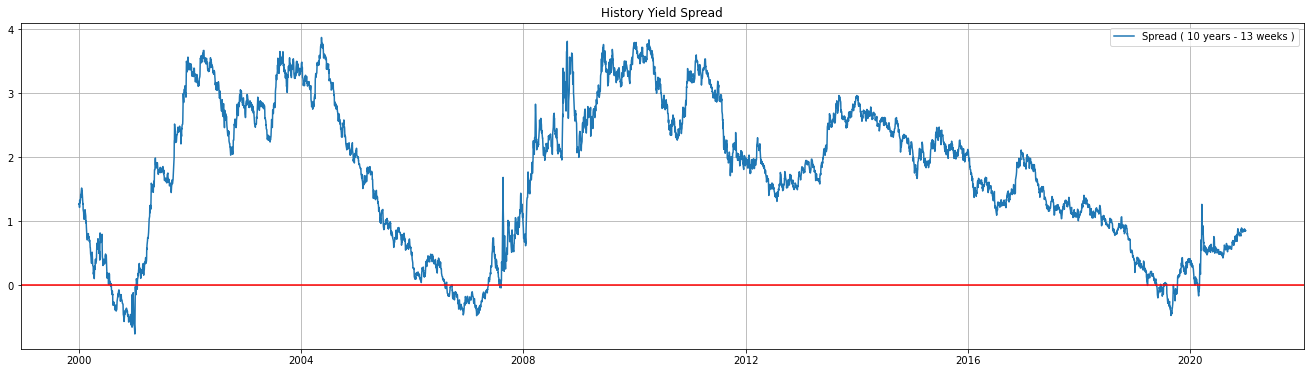

In [9]:
US_10 = US_Treasury_Note(start=dt.datetime(2000,1,1),end=dt.datetime(2021,1,1))
US_10_df = US_10.get_prcie_df(maturity=10)

yield_spread,_ = US_10.history_yield(plot=True)